#  Image FFTs

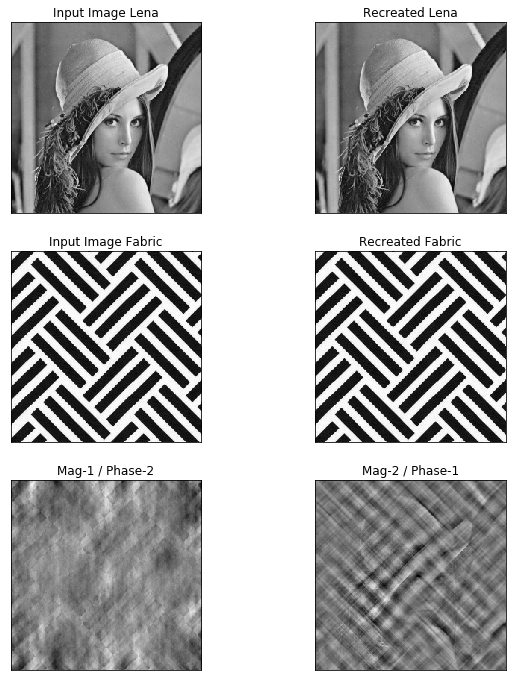

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('q1/lena_grayscale.jpg', cv2.IMREAD_GRAYSCALE) #Reads the image having the shape (512 ,512) and values between [0,255] .
image2 = cv2.imread('q1/fabric_grayscale.jpg',cv2.IMREAD_GRAYSCALE)

f_1 = np.fft.fft2(image)
f_2 = np.fft.fft2(image2)
#Decompose these representations into its magnitudes and phases.
magnitudes_1 = np.absolute(f_1) 
phases_1 = np.angle(f_1)

magnitudes_2 = np.absolute(f_2)
phases_2 = np.angle(f_2)
#Inverse DFT operation is needed to recreate the original images from magnitude and phase information.
recreated_1 = np.multiply(magnitudes_1, np.exp(1j*phases_1))
imgRecreated_1 = np.real(np.fft.ifft2(recreated_1))

recreated_2 = np.multiply(magnitudes_2, np.exp(1j*phases_2))
imgRecreated_2 = np.real(np.fft.ifft2(recreated_2))
#Obtain new images by using one image's phase and other image's magnitude information.
combined_1 = np.multiply(magnitudes_1, np.exp(1j*phases_2))
imgCombined_1 = np.real(np.fft.ifft2(combined_1))
imgCombined_1 = (( imgCombined_1 - np.min(imgCombined_1))/( np.max(imgCombined_1) - np.min(imgCombined_1) ))*255 #Normalization
imgCombined_1 = imgCombined_1.astype(np.uint8)

combined_2 = np.multiply(magnitudes_2, np.exp(1j*phases_1))
imgCombined_2 = np.real(np.fft.ifft2(combined_2))
imgCombined_2 = (( imgCombined_2 - np.min(imgCombined_2))/( np.max(imgCombined_2) - np.min(imgCombined_2) ))*255 #Normalization
imgCombined_2 = imgCombined_2.astype(np.uint8)

plt.rcParams["figure.figsize"] = (10,30)
plt.tight_layout()

plt.subplot(321),plt.imshow(image, cmap = 'gray')
plt.title('Input Image Lena'), plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(imgRecreated_1, cmap = 'gray')
plt.title('Recreated Lena'), plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(image2, cmap = 'gray')
plt.title('Input Image Fabric'), plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(imgRecreated_2, cmap = 'gray')
plt.title('Recreated Fabric'), plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(imgCombined_1, cmap = 'gray')
plt.title('Mag-1 / Phase-2'), plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(imgCombined_2, cmap = 'gray')
plt.title('Mag-2 / Phase-1'), plt.xticks([]), plt.yticks([])
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.5, wspace=None, hspace=0.2)
plt.show()


#  Continuous Signal Sampling

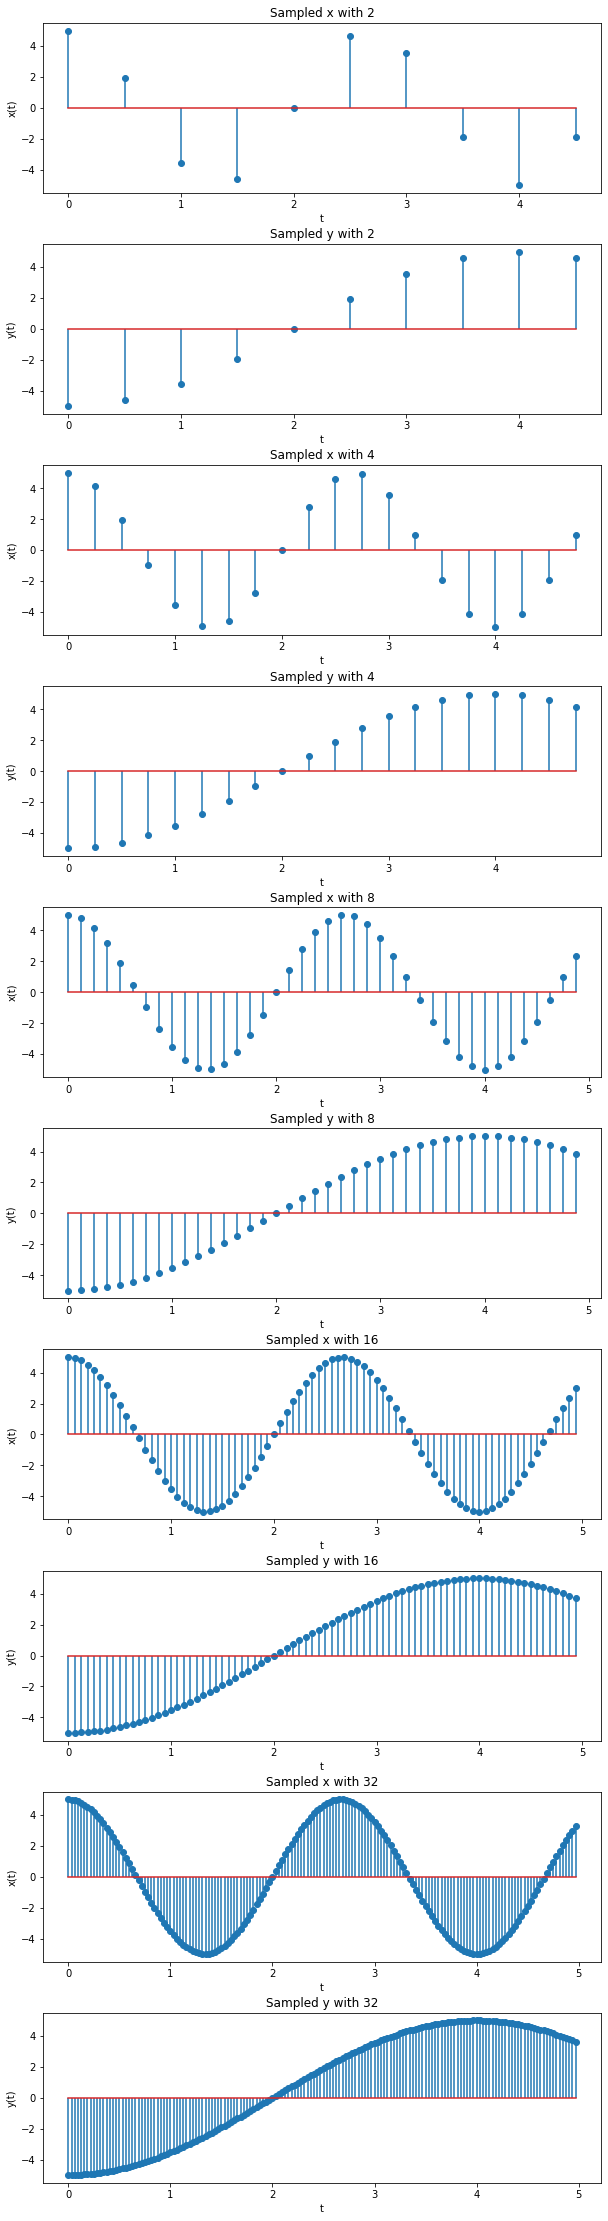

In [2]:
import matplotlib.pyplot as plt
import numpy as np

arr = [ 2, 4 , 8 ,16 , 32]
plt.rcParams["figure.figsize"] = (10,100)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.1)
for i in range(5):
    Fs = arr[i] #sample rate
    T = 1/Fs #sampling period
    t = np.arange(Fs*5.0)*T # time vector for plotting
    x = 5*np.sin(t*3*np.pi/4 + np.pi/2)
    y = 5*np.sin(t*np.pi/4 + 3*np.pi/2)
    ax = fig.add_subplot(10, 1, 2*i+1)
    ax.stem(t,x, use_line_collection=True)
    ax.set_xlabel('t') 
    ax.set_ylabel('x(t)')
    ax.set_title('Sampled x with '+ str(arr[i]))
    ax = fig.add_subplot(10, 1, 2*i +2)
    ax.stem(t,y,use_line_collection=True)
    ax.set_xlabel('t') 
    ax.set_ylabel('y(t)')
    ax.set_title('Sampled y with '+ str(arr[i]))
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.5, wspace=None, hspace=0.3)
plt.show()
